# Лабораторная работа 4. 

## Задание

В данном задании мы будем работать с подмножеством датасета IMDB Movies Reviews из соревнования [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data). 
![](http://i.imgur.com/QZgxFic.png)

Задача состоит в следующем: по отзыву на фильм необходимо понять является ли он положительным или отрицательным. Это один из примеров задачи анализа тональности текста ([sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)). Пример отзыва из выборки:
    
    This can be one of the most enjoyable movies ever if you don't take it seriously. It is a bit dated and the effects are lame, but it is so enjoyable. There are giant crabs that attack a girl. oh, and the crabs sing Japanese. It is amazingly bad. And the ending, which has been telegraphed throughout the entire film is hideously awesome. Predictable, but seeing the final fight will leave you rolling in your seat. Don't even give this film a chance and you will love it. Susan George is fun to watch and yes, she does appear naked. Her daughter isn't quite worth putting up with, but she does get attacked by giant crabs. They are the size of large cats. This is a 2, but I love it. As a movie, my God, but for entertainment, I give it a 7. Did I mention there are giant crabs?

Загрузите датасет из файла *data.tsv*.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('lab.04.tsv', sep='\t')

Для оценки качества в данной задаче мы будем использовать отложенную выборку. Разделите все данные на две части: 16000 объектов будет обучающей выборкой и 4000 объектов — тестовой.

Вам будет необходимо учесть следующие особенности разбиения:
 - оно должно быть воспроизводимо
 - соотношение классов в каждой из частей должно сохраняться (например, при использовании функции *train_test_split* указать *stratify*)

In [3]:
X=data.drop(['sentiment'],axis=1)
y=data.sentiment

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

Одна из сложностей данной задачи — текстовое представление данных, так как не существует какого-то универсального способа извлечения признаков из текстов. По ходу работы мы получим несколько наборов признаков, которые будем сравнивать между собой.

Для начала попробуем самый простой подход, а именно [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) кодирование данных. С помощью него каждый текст будет представлен в виде вектора, размер которого равен размеру словаря, а на каждой позиции стоит число, сколько раз соответствующее слово встретилось в этом тексте. Кроме того, хорошей практикой является отфильтровывать стоп-слова.

Это представление можно получить используя класс [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) из библиотеки sklearn. Одно из удобств данного метода состоит в том, что возвращаемый результат является [sparse](http://docs.scipy.org/doc/scipy-0.15.1/reference/sparse.html)-матрицей, так как при таком преобразовании получается достаточно много 0. Более подробно про такие матрицы можно прочитать, например, [здесь](http://www.scipy-lectures.org/advanced/scipy_sparse/index.html).

Примените *bag-of-words* кодирование данных. Мы рекомендуем обучать здесь и в дальнейшем преобразование на обучающей выборке, после чего применять его к тестовой. Какой размерности стали данные?

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [6]:
X_tr_v=vectorizer.fit_transform(X_train.review)
X_tr_v.columns=vectorizer.vocabulary_.keys()

In [7]:
X_test_v=vectorizer.transform(X_test.review)
X_test_v.columns=vectorizer.vocabulary_.keys()

После того как было получено некоторое подходящее представление данных, хочется обучить алгоритмы классификации и сравнить их между собой. Для этого необходимо понять по каким метрикам будут сравниваться алгоритмы. Для начала можно рассмотреть, например, следующе метрики:

- accuracy: $$ Accuracy = \frac{1}{l}\sum_{i=1}^l[y_i = \hat{y}_i]$$ где $y_i$ — истинный ответ на объекте $x_i$, $\hat{y}_i$ — предсказанный. (мы не рекомендуем переводить *accuracy* как точность, потому что в русскоязычной литературе точностью называют другую метрику)
- точность: $$Precision = \frac{TP}{TP + FP}$$
- полнота: $$Recall = \frac{TP}{TP + FN}$$

где обозначения *TP*, *FP*, *FN* и *TN* — элементы матрицы ошибок:

| | y = 1 | y = 0 |
|------|------|
|   a(x) = 1  | TP| FP |
| a(x) = 0| FN | TN |

Обратите внимание, что точность и полнота вычисляются относительно фиксированного класса. В sklearn есть удобная функция [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), позволяющая сразу вычислять эти метрики для всех классов. 

**(1 балл) Задание 1.**

Какие недостатки для данной задачи вы видите у метрики *Accuracy*?

Обучите логистическую регрессию и случайный лес с 500 деревьев на *bag-of-words* представлении выборки и измерьте качество на тестовых данных с помощью трех описанных выше метрик. Кроме этого, сравните время обучения алгоритмов. Есть ли существенная разница в качестве алгоритмов? Какой из методов кажется менее применимым в данной задаче и почему?

In [11]:
from sklearn import linear_model
logloss = linear_model.SGDClassifier(loss='log')

In [12]:
logloss.fit(X_tr_v,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [13]:
pred_logloss=logloss.predict(X_test_v)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(X_tr_v,y_train)

In [ ]:
import joblib
joblib.dump(rf, 'rf.pkl')

In [17]:
import joblib
rf=joblib.load('rf.pkl')

In [18]:
pred_rf=rf.predict(X_test_v)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_logloss),accuracy_score(y_test, pred_rf)

(0.85650000000000004, 0.83374999999999999)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logloss))

             precision    recall  f1-score   support

          0       0.89      0.88      0.88      2500
          1       0.80      0.82      0.81      1500

avg / total       0.86      0.86      0.86      4000



In [21]:
print(classification_report(y_test, pred_rf))

             precision    recall  f1-score   support

          0       0.81      0.97      0.88      2500
          1       0.92      0.61      0.73      1500

avg / total       0.85      0.83      0.82      4000



    По нескольким параметрам логистическая регрессия показывает лучшие результаты, она и работает быстрее. Лес плохо применяется к задачам с разряженными матрицами обучающих выборок

Посмотрев на указнные метрики, можно понять, что классификаторы неплохо справляются с нулевым классом и похуже — с первым. Скорее всего, это связано с тем, что положительных отзывов почти вдвое меньше. В дальнейшем нас будет интересовать как классификатор справляется именно с положительными отзывами (то есть первым классом). Раньше было замечено, что *accuracy* не самый подходящий способ измерения качества в данной задаче. Подходят ли оставшиеся две метрики для данной задачи? Эти метрики хороши тем, что могут быть использованы в случае несбалансированнх данных, однако сразу же две метрики оптимизировать не удобно. Поэтому рассмотрим другие подходы к оценке качества. 

Зачастую классификатор может возвращать не ответ *0* или *1*, а некоторую меру принадлежности заданному классу $b(x)$, которая сравнивается с фиксированным порогом *t*, и на самом деле классификатор имеет вид $a(x) = [b(x) > t]$. Таким образом, при оценивании качества работы классификатора можно использовать его ответ $b(x)$ и подбирать порог *t* исходя из некоторых других условий. Кроме того, выбор порога влияет на качество классификации:
 - чем больше $t$, тем выше точность, но ниже полнота,
 - чем меньше $t$, тем выше полнота, но ниже точность.
 
### Precision-Recall кривая

Раз мы умеем варьировать порог классификатора, тем самым меняя качество, интересно каким оно будет при всех возможных различных порогах. Для этого обычно строят следующий график: перебирают все пороги и по оси ОХ откладывают полноту получившегося классификатора, а по оси OY — точность. Таким образом, это дает хорошую наглядную визуализацию качества алгоритма.

### ROC кривая

Еще один из способ визуализации зависимости метрик качества от порога, подходящей в этом случае, является *ROC*. По осям: 
 - OX: $FPR = \frac{FP}{FP + TN}$
 - OY: $TPR = \frac{TP}{TP + FN}$

Кроме того, можно измерять площади под указанными кривыми — *auc_pr* и *auc_roc* соответственно.

**(1 балл) Задание 2.**

Постройте *precision-recall* и *roc* кривые обученных выше классификаторов (каждый тип кривой на отдельном графике), а также вычислите площадь под ними. Для этого удобно воспользоваться функциями [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html), [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) и [auc](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc). Не забудьте, что в данном случае необходимо использовать метод *predict_proba* для получения оценки принадлежности к первому классу.

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, logloss.predict_proba(X_test_v).T[1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test_v).T[1])

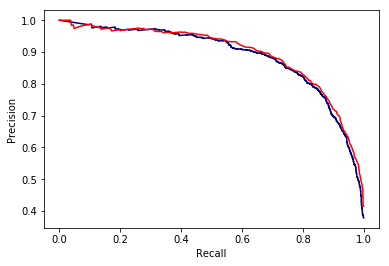

In [24]:
plt.clf()
plt.plot(recall, precision, color='navy')
plt.plot(recall_rf, precision_rf, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Площади

In [25]:
auc(recall,precision),auc(recall_rf,precision_rf)

(0.88884145152799232, 0.89540609332605592)

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, logloss.predict_proba(X_test_v).T[1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_v).T[1])

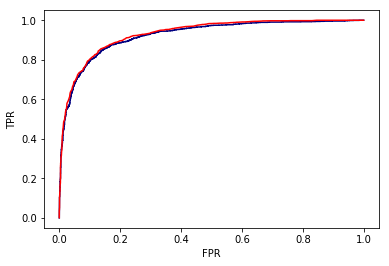

In [27]:
plt.clf()
plt.plot(fpr, tpr, color='navy')
plt.plot(fpr_rf, tpr_rf, color='r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Площади

In [28]:
auc(fpr, tpr), auc(fpr_rf, tpr_rf)

(0.92364026666666665, 0.93154559999999997)

Если мы хотим, чтобы классификатор находил, например, не менее 80% положительных отзывов, то необходимо потребовать, чтобы полнота была не менее 0.8. 

**(0.5 балла) Задание 3.**

Найдите наибольшую точность, которую будет иметь каждый классификатор при полноте не менее 0.8.

In [29]:
np.max(precision[np.where(recall>0.8)]),np.max(precision_rf[np.where(recall_rf>0.8)])

(0.82284541723666216, 0.82806052269601105)

В дальнейшем для экпериментов будем использовать логистическую регрессию. Можно заметить, что по некоторым причинам мы не находили оптимальные параметры для алгоритмов, а работали с параметрами по умолчанию. Чтобы исправить этот недостаток, в дальнейшем используйте кросс-валидацию по 5 блокам для нахождения наилучшего параметра *C* у логистической регрессии. Для этого удобно использовать класс [LogisticRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) с оптимизацией *roc_auc*. Значения параметра *C* можно перебирать по логарифмической шкале и ограничиться 3-5 значениями.

А теперь вернемся к исходной задаче. На данном этапе решения можно прийти к выводу, что предложенное кодирование текста может быть не самым удачным. Это ведет как к ситуации, что не всякий алгоритм может быть применен в данной задаче по причине слишком большого признакового пространства, а кроме того, даже быстрые алгоритмы при наличии кросс-валидации могут начать работать медленно. Также в данных может быть шум, так как в качестве словаря были взяты все слова, даже те, которые встречались в одном-двух отзывах (например, опечатки). Поэтому кажется что неплохо было бы сократить размерность данных и по возможности избавиться от шума. 

## Отбор признаков и уменьшение размерности

### По частоте
Попробуем сформировать выборку, в которой будут находиться только самые "важные" признаки, то есть в данном случае слова. Например, это можно сделать оставив топ слов по частоте. Кажется, что вхождение наиболее частых слов в отзыве, например *good*, *bad* и т.д. являются вполне неплохими показателями.

### С помощью машинного обучения
Другой подход — воспользоваться имеющимся машинным обучением — обученным на всех признаках случайным лесом. Одним из свойств случайного леса является оценка важности признаков. Таким образом, можно выбрать топ слов, важных как признаки для задачи классификации. 

### Hashing trick
Какие еще могут быть способы работы с такого рода данными? По факту слова в текстах — это некоторое очень разреженное представление (как мы убедились выше). Подходом, отличным от двух вышеперечисленных, является [хэширование](https://en.wikipedia.org/wiki/Feature_hashing) или hashing trick: каждому слову сопоставляется некоторый хэш, после чего делается, например, bag-of-words. Из-за коллизий можно обработать не встречавшихся ранее слов. Этот подход реализован в классе [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html). Кроме того, если выставить параметр *non_negative=True*, то можно интерпретировать полученные значения как некоторые "частоты".

Можно заметить, что два последних подхода можно применять не обязательно к текстовым данным.

**(1 балл) Задание 4.**

Сформируйте три новые выборки, где каждый объект будет иметь 15000 признаков, следующим образом:
 - топ самых частотных слов
 - топ наиболее "важных" слов с помощью случайного леса
 - с помощью хэширования
 
(и не забывайте фильтровать стоп-слова).

На четырех выборках (*bag-of-words* и трех новых) постройте *roc*-кривые, вычислив площадь под ними. Что вы можете сказать о качестве этих подходов к сокращению размерности?

Выведите топ20 самых важных слов от случайного леса и сравните их с топ20 наиболее частотных. Много ли общих слов?

In [30]:
fvectorizer = CountVectorizer(max_features = 15000,stop_words='english')
X_tr_freq = fvectorizer.fit_transform(X_train.review)
X_tr_freq.columns=fvectorizer.vocabulary_.keys()

In [31]:
X_test_freq = fvectorizer.transform(X_test.review)
X_test_freq.columns=fvectorizer.vocabulary_.keys()

In [32]:
fi = np.argsort(rf.feature_importances_)[::-1][:15000]
X_tr_fi = (X_tr_v.T[fi]).T
X_test_fi = (X_test_v.T[fi]).T

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(stop_words='english', non_negative=True,n_features=15000)

In [34]:
X_tr_h = hvectorizer.fit_transform(X_train.review)
X_test_h = hvectorizer.transform(X_test.review)

In [35]:
from sklearn.linear_model import LogisticRegressionCV
loglosscv=LogisticRegressionCV(Cs=[0.01,0.1,1,10],cv=5)

In [36]:
loglosscv.fit(X_tr_freq,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, loglosscv.predict_proba(X_test_freq).T[1])

In [38]:
loglosscv.fit(X_tr_fi,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [39]:
fpr_fi, tpr_fi, thresholds_fi = roc_curve(y_test, loglosscv.predict_proba(X_test_fi).T[1])

In [40]:
loglosscv.fit(X_tr_h,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [41]:
fpr_h, tpr_h, thresholds_h = roc_curve(y_test, loglosscv.predict_proba(X_test_h).T[1])

In [42]:
loglosscv.fit(X_tr_v,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [43]:
fpr_v, tpr_v, thresholds_v = roc_curve(y_test, loglosscv.predict_proba(X_test_v).T[1])

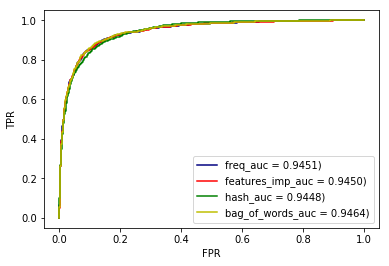

In [44]:
plt.clf()
plt.plot(fpr, tpr, color='navy', label='freq_auc = {0:0.4f})'
               ''.format(auc(fpr,tpr)))
plt.plot(fpr_fi, tpr_fi, color='r', label='features_imp_auc = {0:0.4f})'
               ''.format(auc(fpr_fi,tpr_fi)))
plt.plot(fpr_h, tpr_h, color='g', label='hash_auc = {0:0.4f})'
               ''.format(auc(fpr_h,tpr_h)))
plt.plot(fpr_v, tpr_v, color='y', label='bag_of_words_auc = {0:0.4f})'
               ''.format(auc(fpr_v,tpr_v)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

Все методы сокращения размерности показали примерно одинаковые хорошие результаты и работали быстрее, чем bag of words/ Лучший - выбор частовстречающихся слов

In [45]:
for f in range(20):
    print(list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(fi[f])])

bad
great
worst
waste
excellent
wonderful
best
awful
perfect
terrible
movie
boring
plot
worse
just
love
amazing
poor
stupid
don


In [46]:
tfvectorizer = CountVectorizer(max_features = 20,stop_words = 'english')
tfvectorizer.fit(X_train.review)
list(tfvectorizer.vocabulary_.keys())

['time',
 'movie',
 'bad',
 'like',
 'movies',
 'watch',
 'way',
 'story',
 'really',
 'good',
 'great',
 'just',
 'think',
 'br',
 'film',
 'don',
 'characters',
 'make',
 'plot',
 'people']

Общие слова есть, прилагательные, характеризующие отношение. Random forest выбирал их важными

Таким образом, удалось сократить размерность более чем в три раза без сильной потери в качестве. Но даже 15000 признаков — это достаточно много. Допустим, мы хотим уменьшить размерность до 2000 признаков, однако можно заметить, что даже три предыдущие способа давали небольшое ухудшение в качестве. 

### PCA

Одним из способов сокращения размерности является [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) (метод главных компонент). Это преобразование позволяет получить вес каждого признака в компоненте. Например, если применить его к bag-of-words, можно найти наиболее важные слова, влияющие на данную компоненту. Для работы с большими разреженными матрицами в sklearn рекомендуется использовать [TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). Обратите внимание, что обучение этого преобразования может работать около 3-5 минут.

**(1 балл) Задание 5.**

Попробуйте сократить размерность до 2000 двумя способами:
 - наилучшим из трех предыдущих
 - для выборки со всеми признаками обучите *PCA*-преобразование 

Постройте новый график качества. Какой из двух подходов работает лучше?

Для первых трех компонент преобразования найдите топ30 наиболее важных слов. Можете ли вы охарактеризовать как-то каждую из этих групп?

In [126]:
from sklearn.decomposition import TruncatedSVD
TR = TruncatedSVD(n_components=20000,  random_state=4)

In [ ]:
X_tr_pca = TR.fit_transform(X_tr_v)

Dead kernel все время получался

In [ ]:
X_test_pca = TR.transform(X_test_v)

### Какие еще могут быть способы обработки текстовых данных?

Как можно заметить, подход с мешком слов весьма наивен, так как не позволяет учесть информацию в скольки отзывах встречалось слово (чтобы избавиться от очень редких слов, например). В этом случае может помочь, например, [tf-idf кодирование](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

Другой недостаток описанного в задании подхода — брать абсолютные частоты. У некоторых слов они могут быть очень большими, в то же время у других — низкими. Чтобы "сгладить" разницу между ними, можно их отлогарифмировать, т.е. применить преобразование $x \to log(x + 1)$ (так как при bag-of-words кодировании могут встречаться 0).

Неплохое руководство можно найти в разделе [извлечения признаков](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) из документации sklearn.


## Stacking

Итак, сейчас имеется несколько разных способов охарактеризовать исходный датасет:
 - bag-of-words
 - bag-of-words для 15000 наиболее частотных слов
 - bag-of-words для 15000 наиболее важных признаков
 - признаки, полученные в результате хэширования
 - применение PCA для bag-of-words

Во второй лабораторной вы пробовали линейно смешивать несколько классификаторов для улучшения итогового качества, перебирая коэффициенты смешивания по сетке. А вообще говоря, подбор оптимальных линейных коэффициентов — это задача обучения линейной модели, которую мы уже давно изучаем в курсе. Так что давайте попробуем смешивать базовые алгоритмы, подбирая коэффициенты с помощью обученной поверх их предсказаний линейной мета-модели. В этом случае схема обучения будет выглядеть следующим образом:

![](http://cse-wiki.unl.edu/wiki/images/5/54/Combining_classifiers_overview.png)

Такой подход, когда предсказания одних алгоритмов подаются на вход другому алгоритму, называется stacking. Плюс такого подхода будет заключаться в том, что новое признаковое описание будет небольшим, поэтому можно легко использовать любые известные вам методы.

**(1.5 балла) Задание 6.**

 - Объясните, будет ли происходить переобучение, если обучать базовые алгоритмы и мета-модель на одной и той же выборке? Для простоты можете представить, что в качестве базового алгоритма используется 1-NN.
 - Для начала разделите каждую обучающую выборку на две части и на одной из частей обучите базовые классификаторы (в данном случае — логистическую регрессию). Сделайте разделение таким образом, чтобы для обучения мета-алгоритма осталось 4000 объектов.
 - Сделайте предсказание этих классификаторов на оставшейся части
 - На ответах классификаторов обучите новый классификатор, который и будет являться мета-алгоритмом. В качестве мета-классификатора рассматрите SVM с линейным ядром, логистическую регрессию и случайный лес со 100 деревьями. 

Для всех ли мета-классификаторов этот подход дал прирост в качестве?

In [65]:
X_meta=pd.DataFrame(columns=['freq','fi','hash','bow'])

In [66]:
loglosscv.fit(X_tr_freq,y_train)
X_meta['freq']=loglosscv.predict(X_test_freq)

In [67]:
loglosscv.fit(X_tr_fi,y_train)
X_meta['fi']=loglosscv.predict(X_test_fi)

In [68]:
loglosscv.fit(X_tr_h,y_train)
X_meta['hash']=loglosscv.predict(X_test_h)

In [69]:
loglosscv.fit(X_tr_v,y_train)
X_meta['bow']=loglosscv.predict(X_test_v)

In [70]:
joblib.dump(X_meta, 'X_test_meta.pkl')

['X_test_meta.pkl']

In [79]:
X_train_meta, X_test_meta, y_train_meta, y_test_meta= train_test_split(X_meta, y_test, test_size=0.3, random_state=5, stratify=y_test)

In [82]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train_meta,y_train_meta)
pred_svm = svm.predict_proba(X_test_meta)[:,1]
fpr_svm, tpr_svm, thresholds = roc_curve(y_test_meta, pred_svm)
auc_svm = auc(fpr_svm, tpr_svm)
print(auc_svm)

0.867111111111


In [85]:
from sklearn.linear_model import LogisticRegression
logloss = LogisticRegression()
logloss.fit(X_train_meta,y_train_meta)
pred_logloss = logloss.predict_proba(X_test_meta)[:,1]
fpr_logloss, tpr_logloss, thresholds = roc_curve(y_test_meta, pred_logloss)
auc_logloss = auc(fpr_logloss, tpr_logloss)
print(auc_logloss)

0.885407407407


In [86]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_meta,y_train_meta)
pred_rf = rf.predict_proba(X_test_meta)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_meta, pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(auc_rf)

0.882257777778


In [91]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_test_freq, y_test, test_size=0.3, random_state=5, stratify=y_test)

In [95]:
logloss.fit(X_train_2,y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
fpr_2, tpr_2, thresholds = roc_curve(y_test_2, logloss.predict_proba(X_test_2).T[1])

In [97]:
auc(fpr_2, tpr_2)

0.89914962962962952

Метаподход не дал прироста, может быть, из-за плохо подобранных гиперпараметров.

## Подбор гиперпараметров

Вы уже знаете, что для подбора гиперпараметров есть способ перебора по сетке. Обычно перебор некоторых значений гиперпараметров ведется по логарифмической шкале, так как это позволяет быстрее определить какого порядка должен быть параметр, и в то же время значительно уменьшить время поиска. Последний нюанс бывает особо критичен, т.к. для каждого фиксированного набора параметров происходит обучение алгритма и оценка качества. 

Однако такой подход к нахождению гиперпараметров является не единственно возможным. Рассмотрим более конкретно в чем может заключаться недостаток предыдущего подхода. Допустим, вам нужно подобрать 2 гиперпараметра, для каждого из которых есть сетка из 4 возможных значений. То есть всего 16 итераций обучения по сетке. Допустим также, что для оценки качества используется 5-fold CV. В итоге имеем 80 переобучений алгоритма, что уже немало. А если, например, рассмотреть случаный лес, где гиперпараметрами могут являться критерий ветвления, максимальная глубина деревьев, минимальное число объектов в листьях, максимальное число признаков, количество листьев и так далее, может получиться экспоненциально большое число переобучений, что займёт очень много времени. Для того чтобы как-то ускорить процесс и в то же время найти близкие к оптимальным значения используют случайный поиск по сетке. В этом случае для каждого гиперпараметра задается распределение, из которого он выбирается. И так как каждый раз значение каждого гиперпараметра выбирается случайно, это позволяет находить оптимальные значения быстрее. 

Если сравнить случайный поиск с обычным, то это можно проиллюстрировать, например, следующим образом:

![](http://blog.kaggle.com/wp-content/uploads/2015/07/scikitlearn8.jpeg)

Более подробно можно прочитать тут:
 - теоретический анализ случайного поиска [Random Search for Hyper-Parameter Optimization](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf)
 - кратко и с юмором [Smarter Parameter Sweeps (or Why Grid Search Is Plain Stupid)](https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881#.pkwq17od8)
 
В sklearn случайный поиск по сетке реализован в классе [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html).

Давайте попробуем сравнить описанные подходы на практике. А именно, посмотрим, как ведет себя обычный и случайный поиск по сетке при одинаковом бюджете (то есть числе итераций). Попробуем найти аптимальные гиперпараметры для мета-классификатора выше: SVM с линейным ядром. В данном случае нам будет интересны найти значения у двух параметров: *C* и количество итераций *max_iter*. Для обоих гиперпараметров возьмите логарифмическую шкалу, для *C* от 0.1 до 100, для *max_iter* от 1000 до 10000 (см. функцию [logspace](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.logspace.html)). В качестве оптимизируемой метрики качества выберем *AUC-ROC*.

**(2 балла) Задание 7.**

 - Для простого поиска по сетке подготовьте 5 сеток гиперпараметров, так чтобы каждый у каждого гиперпараметра перебиралось 2, 3, 4, 5 и 6 значений в соответствующей сетке. Таким образом у вас получится 5 запусков поиска параметров с бюджетом 4, 9, 16, 25, 36. 

 - Для случайного поиска сделайте 5 запусков поиска гиперпараметров с числом итераций (бюджетом) 4, 9, 16, 25, 36. 

 - Для каждого из запусков алгоритма подбора гиперпараметров (одного — обычной и 5 для случайной) вычислите наилучшее достигнутое качество для каждого бюджета. После чего постройте график, где по оси OX будет отложен бюджет, а по оси OY — наилучшее качество. 
 
Что вы можете сказать о получившемся графике? Посмотрите на наилучшие параметры, которые у вас получились. Можно ли сказать, что какой-то из параметров больше влияет на результат? Можно ли сделать вывод, что случайный поиск проигрывает? Или наоборот? Зависит ли ответ на предыдущий вопрос от размера бюджета или удачной инициализации?

Обратите внимание, что данная часть лабораторной работы может работать долго. Поэтому рекомендуем обратить внимание на параметр *n_jobs* поиска по сетке (есть у обоих классов).

In [117]:
svm = SVC( kernel='linear',probability = True)
params = [{'C':np.logspace(-1,2, num=2),'max_iter':np.logspace(3,4, num=2).astype(int)},\
    {'C':np.logspace(-1,2, num=3),'max_iter':np.logspace(3,4, num=3).astype(int)},\
    {'C':np.logspace(-1,2, num=4),'max_iter':np.logspace(3,4, num=4).astype(int)},\
    {'C':np.logspace(-1,2, num=5),'max_iter':np.logspace(3,4, num=5).astype(int)},\
    {'C':np.logspace(-1,2, num=6),'max_iter':np.logspace(3,4, num=6).astype(int)}]


In [118]:
from sklearn.model_selection import GridSearchCV
params_gs = []
score_gs = []
for i in range(5):
    params_i = params[i]
    clf = GridSearchCV(svm, params_i, cv = 5,scoring='roc_auc')
    clf.fit(X_meta, y_test)
    params_gs.append(clf.best_params_)
    score_gs.append(clf.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider p

In [108]:
from scipy.stats import uniform 
params = {'C':uniform(0.1, 100),'max_iter':uniform(1000, 10000)}

In [113]:
from sklearn.grid_search import RandomizedSearchCV
params_rs = []
score_rs = []
for i in range(2,7):
    clf = RandomizedSearchCV(svm, param_distributions=params,scoring='roc_auc', n_iter=i*i)
    clf.fit(X_meta, y_test)
    params_rs.append(clf.best_params_)
    score_rs.append(clf.best_score_)

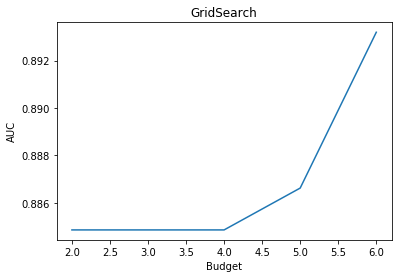

In [119]:
plt.plot(np.array( range(2,7)),np.array(score_gs))
plt.xlabel('Budget')
plt.ylabel('AUC')
plt.title('GridSearch')
plt.show()

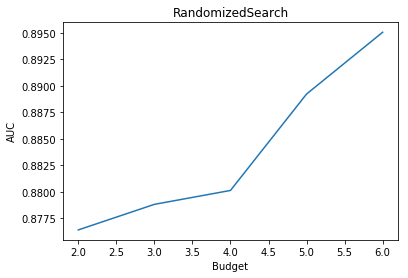

In [120]:
plt.plot(np.array( range(2,7)),np.array(score_rs))
plt.xlabel('Budget')
plt.ylabel('AUC')
plt.title('RandomizedSearch')
plt.show()

In [124]:
score_gs

[0.88485466666666657,
 0.88485466666666657,
 0.88485466666666657,
 0.88662133333333326,
 0.89319733333333329]

In [125]:
score_rs

[0.8764168321170196,
 0.8788280014185531,
 0.8801403585937971,
 0.8892339204199666,
 0.8950616008072294]

In [122]:
params_gs

[{'C': 0.10000000000000001, 'max_iter': 1000},
 {'C': 0.10000000000000001, 'max_iter': 1000},
 {'C': 0.10000000000000001, 'max_iter': 1000},
 {'C': 17.782794100389228, 'max_iter': 1000},
 {'C': 25.118864315095795, 'max_iter': 1000}]

In [121]:
params_rs

[{'C': 52.16668879410016, 'max_iter': 8502.2225316337153},
 {'C': 72.355502429589649, 'max_iter': 7396.6131942366446},
 {'C': 75.506465778318599, 'max_iter': 4498.8456281080316},
 {'C': 0.84585227748329428, 'max_iter': 5378.123725802694},
 {'C': 0.11948548586063748, 'max_iter': 8109.7450273608101}]

## Калибровка классификатора

Для измерения качества классификации помимо описанных ранее метрик может использоваться, например, *logloss*. 

В бинарном случае эта метрика записывается как $$logloss = -\dfrac{1}{N}\sum_{i=1}^N (y_i\log{p_i} + (1-y_i)\log{(1 - p_i)})$$

В отличии от *AUC-ROC*, для этой метрики необходимо, чтобы классификатор умел предсказывать вероятность принадлежности к классу, а не "степени принадлежности классу 1" в неопределенной шкале. Приведем пример. Вероятностная шкала может быть нужна, если вы хотите оценить количество денег, которые в среднем принесёт пользователь, кликнув на баннер. Для этого необходимо умножить количество денег, которые вы получаете за клик на баннер, на вероятность клика пользователя, которую предсказывает модель.

К сожалению, на практике часто получается так, что либо классификатор не обладает желаемым свойством (например, SVM без специальных настроек), либо метод *predict_proba* возвращает некорректную вероятность (например, случайный лес возвращает среднее арифметическое вероятностей от каждого дерева, которое не обязано являться корректной вероятностью, подробнее [здесь](http://people.dsv.su.se/~henke/papers/bostrom08b.pdf)).

В этом случае возможны несколько подходов: 
 - заменить классификатор на тот, который умеет предсказывать вероятности
 - воспользоваться калибровкой ответов.
 
Первый случай не всегда подходит, поэтому остановимся на втором. По умолчанию SVM может вычислять отступ от данного объекта до разделяющей гиперплоскости, а не возвращать вероятности. После чего можно обучить преобразование, которое бы искажало бы возвращаемое значение в вероятность  — это и называется калибровкой. Есть несколько известных методов для этого:
 - калибровка Платта;
 - изотоническая регрессия.

Обратите внимание, что преобразование необходимо обучать на отложенной выборке (то есть классификатор и калибровка должны производиться на разных подмножествах данных), иначе можно переобучиться. Калибровку можно применять к любым классификаторам (где это разумно и необходимо), особенно к тем, которые не оптимизируют log-loss явно.

Для калибровки классификатора в sklearn возможны два подхода:
 - взять уже обученный классификатор и откалибровать его на отложенной выборке
 - откалибровать по кросс-валидации: калибровочному классификатору передается вся обучающая выборка, которая внутри разбивается на обучающую и калибровочную, после чего происходит усреднение вероятностей по фолдам.
 
Подробнее об этом можно прочитать в [документации](http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV). Также [здесь](https://jmetzen.github.io/2015-04-14/calibration.html) узнать подробности о калибровке в sklearn от автора.

**(2 балла) Задание 8.**
 
Рассмотрим SVM из предыдущего пункта. Примените оба описанных выше подхода для калибровки Платта и изотонической регрессии. 
 - Для каждого из подходов постройте график, на котором будут изображены [калибровочные кривые](http://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html): идеальная, исходного классификатора, а также для каждого из методов на обучающей выборке. Эта кривая строится путем упорядочения всех объектов по предсказанному значению, которые разбиваются на бины. По оси OX откладывается среднее предсказанное значение вероятности по бину, а по OY — доля положительных примеров. В случае идеальных вероятностей это будет прямая.
 - Посчитайте *logloss* на тестовой выборке для исходного и классификатора после калибровки.
 - Дает ли калибровка прирост качества?
 - Какой из способов калибровки в данном случае работает лучше?
 - Какой из подходов (калибровка на отложенной выборке или по кросс-валидации) дает более хороший результат?
 - Почему калибровка практически не должна повлиять на *AUC-ROC*? 
 
Обратите внимание, что по умолчанию SVM не реализует метод *predict_proba*. Поэтому для него можно воспользоваться методом *decision_function*, который вернет значение отступа. После этого отмасштабируйте полученные отступы в интервал [0, 1], применив сигмоиду или линейное преобразование.

In [158]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import log_loss

In [137]:
svm = SVC( C = params_rs[-1]['C'], max_iter = params_rs[-1]['max_iter'], kernel='linear',probability = False)

Калибровка по отложенной выборке

In [174]:
X_train_cal, X_test_cal, y_train_cal, y_test_cal= train_test_split(X_test_meta, y_test_meta, test_size=0.8, random_state=7, stratify=y_test_meta)

In [175]:
svm.fit(X_train_meta, y_train_meta)
prob_pos = svm.decision_function(X_test_cal)
prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
print("svm_log_loss:",log_loss(y_test_cal, prob_pos_svm))

sigmoid = CalibratedClassifierCV(base_estimator=svm, method='sigmoid', cv='prefit')
isotonic = CalibratedClassifierCV(base_estimator=svm, method='isotonic', cv='prefit')
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

fraction_of_positives, mean_predicted_value = calibration_curve(y_test_cal, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
            label="%s" % ('svm', ))

ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
            histtype="step", lw=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(sigmoid,"sigmoid"),(isotonic,"isotonic")]:
    clf.fit(X_train_cal, y_train_cal)
    prob_pos = clf.predict_proba(X_test_cal)[:, 1]
    print(name+"_log_loss:",log_loss(y_test_cal, prob_pos))

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test_cal, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

AttributeError: 'CalibratedClassifierCV' object has no attribute 'decision_function'

Калибровка про кросс-валидации

SVM_log_loss: 3.20101803736
sigmoid_log_loss: 0.34605049477
isotonic_log_loss: 0.343816837562


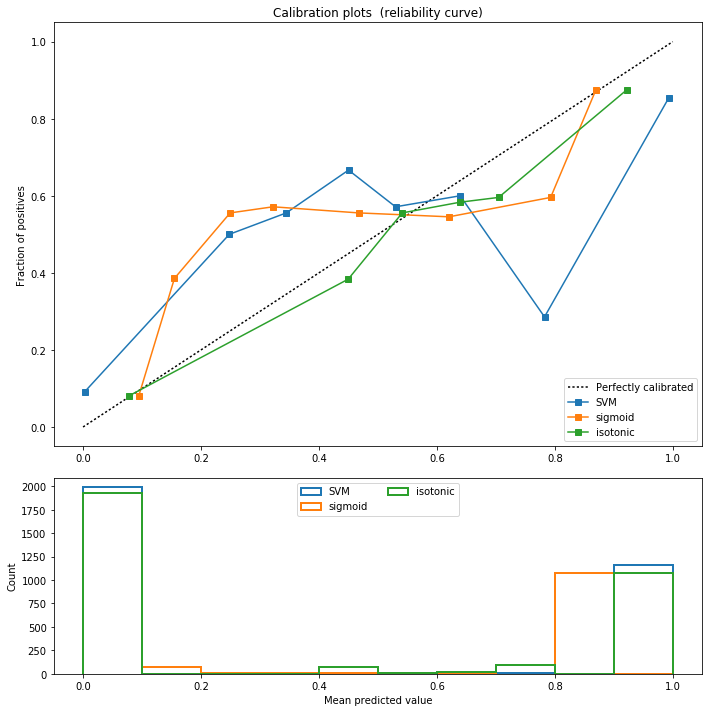

In [168]:
sigmoid = CalibratedClassifierCV(base_estimator=svm, method='sigmoid', cv=5)
isotonic = CalibratedClassifierCV(base_estimator=svm, method='isotonic', cv=5)
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(svm, 'SVM'),(sigmoid,"sigmoid"),(isotonic,"isotonic")]:
    clf.fit(X_train_meta, y_train_meta)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_meta)[:, 1]

    else:  # use decision function
        prob_pos = clf.decision_function(X_test_meta)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    print(name+"_log_loss:",log_loss(y_test_meta, prob_pos))

    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test_meta, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

Калибровка дает прирост качества по метрике logloss/ второй подход (по кросс-валидации) работает лучше. В обоих подходах работает лучше изотоническая регресия.
Калибровка мало влияет на степень уверенности принадлежности классу, она масштабирует порог, и auc почти не должна измениться.